In [59]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns

In [68]:
train_df = pd.read_csv("input/train.csv")
train_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.12,Premium,H,SI1,61.6,59.0,6.67,6.63,4.10,5363
1,1,1.14,Very Good,E,SI2,60.0,54.0,6.74,6.97,4.11,5593
2,2,0.90,Very Good,D,SI2,60.3,63.0,6.12,6.22,3.72,3534
3,3,0.71,Ideal,E,VS1,61.9,54.0,5.74,5.76,3.56,3212
4,4,0.34,Very Good,F,SI2,60.0,62.0,4.51,4.55,2.72,447


*CARAT=(PESO)-->El peso de un diamante se expresa en quilates.

*CUT (TALLA)-->El “Cut” del diamante es el proceso que se utiliza para convertir el cristal bruto en un diamante tallado listo. 

*CLARITY (PUREZA)--> pureza de un diamante al hacer referencia a la presencia o ausencia de imperfecciones. IF a VS2.

*COLOR (COLOR)--> "D”(incoloro, el mejor grado) a “Z”(más amarillento).

In [69]:
train_df.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [70]:
train_df.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

Se observan que no hay nulos,por lo que el data a priori esta bastante limpio.Al realizar un dtypes s eobserva que no todos los datos son numéricos,como deberian para su posterior manipulación,por ello se transforman a numericos las columnas cut/color.Para ello se utilazaŕa el LabelEncoder.

In [71]:
le = preprocessing.LabelEncoder()
train_df["cut_2"] = le.fit_transform(train_df["cut"])
train_df["color_2"] = le.fit_transform(train_df["color"])
train_df["clarity_2"] = le.fit_transform(train_df["clarity"])
train_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price,cut_2,color_2,clarity_2
0,0,1.12,Premium,H,SI1,61.6,59.0,6.67,6.63,4.10,5363,3,4,2
1,1,1.14,Very Good,E,SI2,60.0,54.0,6.74,6.97,4.11,5593,4,1,3
2,2,0.90,Very Good,D,SI2,60.3,63.0,6.12,6.22,3.72,3534,4,0,3
3,3,0.71,Ideal,E,VS1,61.9,54.0,5.74,5.76,3.56,3212,2,1,4
4,4,0.34,Very Good,F,SI2,60.0,62.0,4.51,4.55,2.72,447,4,2,3


In [72]:
train_df =train_df.drop(train_df.columns[[0, 2, 3, 4]], axis='columns')
train_df.head()

,carat,depth,table,x,y,z,price,cut_2,color_2,clarity_2
0,1.12,61.6,59.0,6.67,6.63,4.10,5363,3,4,2
1,1.14,60.0,54.0,6.74,6.97,4.11,5593,4,1,3
2,0.90,60.3,63.0,6.12,6.22,3.72,3534,4,0,3
3,0.71,61.9,54.0,5.74,5.76,3.56,3212,2,1,4
4,0.34,60.0,62.0,4.51,4.55,2.72,447,4,2,3


Una vez que tenemos todas las celdas numéricas y eliminadas las columnas repetidas,vamos a mirar el peso de las distintas variables en el precio,con una matriz de correlación y un heatmap,para ver cuales son aquellas que influyen más sobre este.

In [76]:
train_df.corr()

,carat,depth,table,x,y,z,price,cut_2,color_2,clarity_2
carat,1.000000,0.028899,0.178948,0.974698,0.944318,0.947809,0.920994,0.018654,0.290270,-0.215731
depth,0.028899,1.000000,-0.298248,-0.025145,-0.029319,0.094562,-0.009756,-0.194890,0.045644,-0.052483
table,0.178948,-0.298248,1.000000,0.193161,0.179688,0.146999,0.125868,0.156817,0.024696,-0.084450
x,0.974698,-0.025145,0.193161,1.000000,0.967194,0.965231,0.884080,0.023197,0.268739,-0.227692
y,0.944318,-0.029319,0.179688,0.967194,1.000000,0.940881,0.858680,0.028172,0.259930,-0.218013
z,0.947809,0.094562,0.146999,0.965231,0.940881,1.000000,0.856299,0.002761,0.264584,-0.224615
price,0.920994,-0.009756,0.125868,0.884080,0.858680,0.856299,1.000000,0.043197,0.170355,-0.071126
cut_2,0.018654,-0.194890,0.156817,0.023197,0.028172,0.002761,0.043197,1.000000,-0.003245,0.030233
color_2,0.290270,0.045644,0.024696,0.268739,0.259930,0.264584,0.170355,-0.003245,1.000000,-0.030241
clarity_2,-0.215731,-0.052483,-0.084450,-0.227692,-0.218013,-0.224615,-0.071126,0.030233,-0.030241,1.000000


Se observa que sobre la variable precio aquellas que más influyen son la (x,y,z) y caract, y en una menos medida el table y el color,mientras que el resto de variables casi no tienen peso sobre el precio.
Por ello,probaremos nuestros modelos con todas las variables,aunque no tenga demasiado peso,y sólo con las variables de peso principal,a ver como varian las metricas.

<AxesSubplot:>

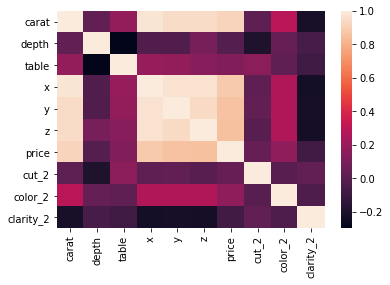

In [77]:
sns.heatmap(train_df.corr())

In [78]:
train_df.to_csv('datos limpios')